In [2]:
from matplotlib.image import imread
import numpy as np
import matplotlib.pyplot as plt
import os
import pywt


plt.rcParams['figure.figsize'] = [16, 16]
plt.rcParams.update({'font.size': 18})

A = imread(os.path.join('pic.jpg'))
B = np.mean(A, -1)  # Convert RGB to grayscale


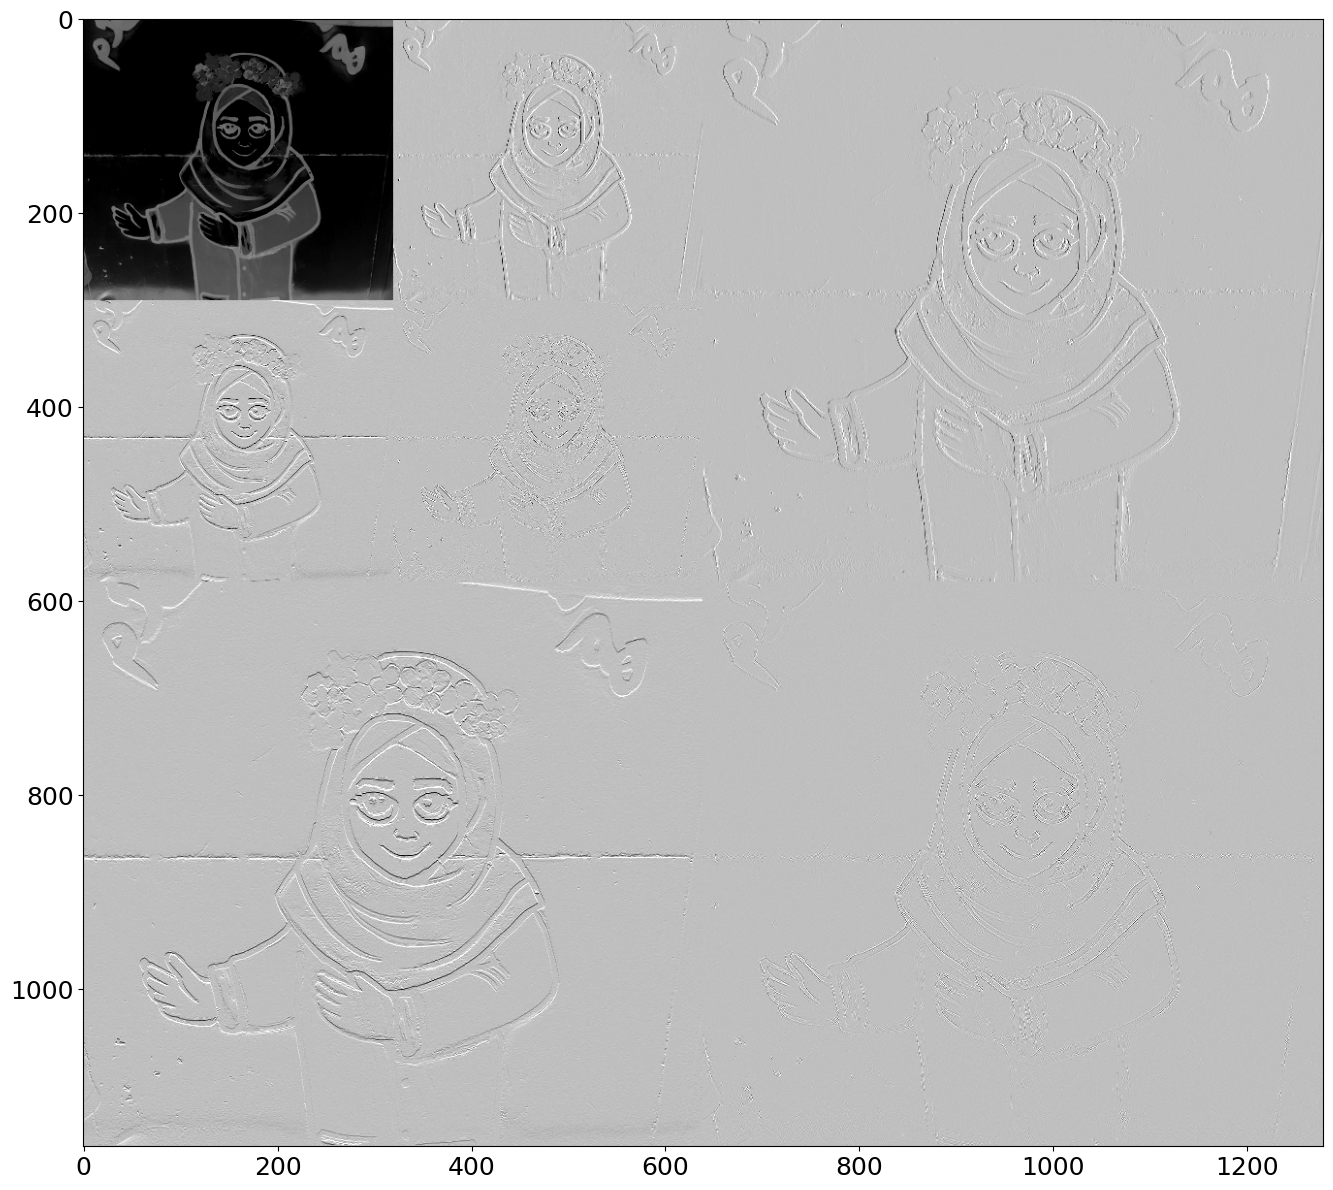

<Figure size 1800x1600 with 0 Axes>

In [3]:
# Wavelet decomposition (2 level)
n = 2
w = 'db1'
coeffs = pywt.wavedec2(B, wavelet=w, level=n)

# normalize each coefficient array
coeffs[0] /= np.abs(coeffs[0]).max()
for detail_level in range(n):
    coeffs[detail_level + 1] = [d / np.abs(d).max() for d in coeffs[detail_level + 1]]

arr, coeff_slices = pywt.coeffs_to_array(coeffs)

plt.imshow(arr, cmap='gray_r', vmin=-0.25, vmax=0.75)
plt.rcParams['figure.figsize'] = [16, 16]
fig = plt.figure(figsize=(18, 16))
plt.show()


In [4]:
# Using the PyWavelets module, available at
# https://pywavelets.readthedocs.io/en/latest/install.html

from matplotlib.image import imread
import numpy as np
import matplotlib.pyplot as plt
import os
import pywt

plt.rcParams['figure.figsize'] = [16, 16]
plt.rcParams.update({'font.size': 18})

A = imread(os.path.join('pic.jpg'))
B = np.mean(A, -1)  # Convert RGB to grayscale


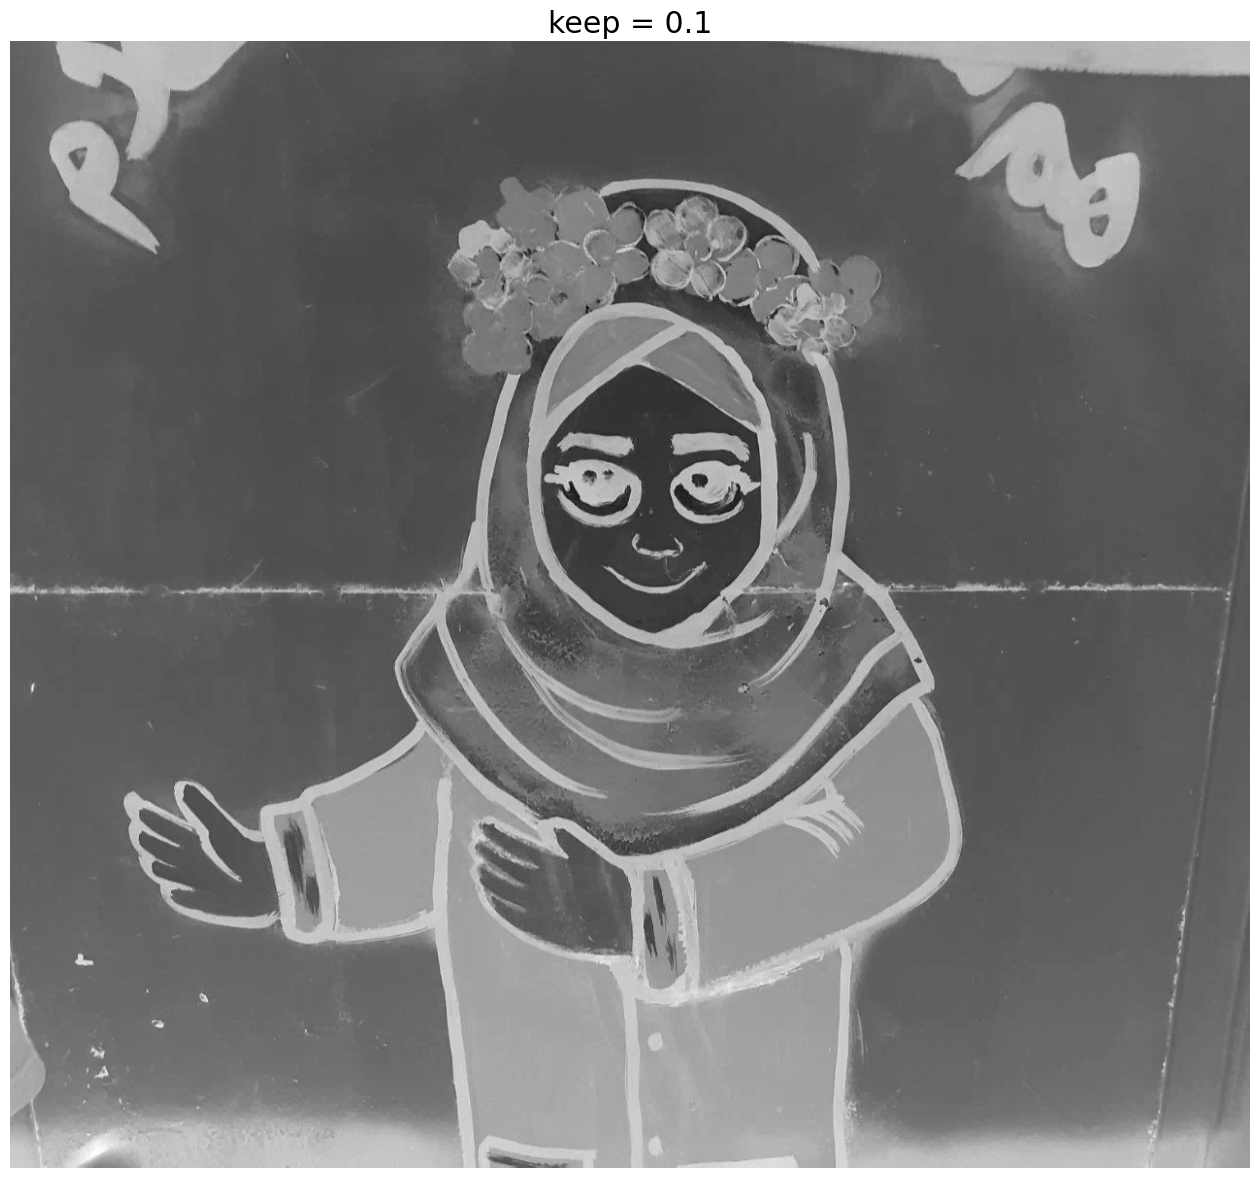

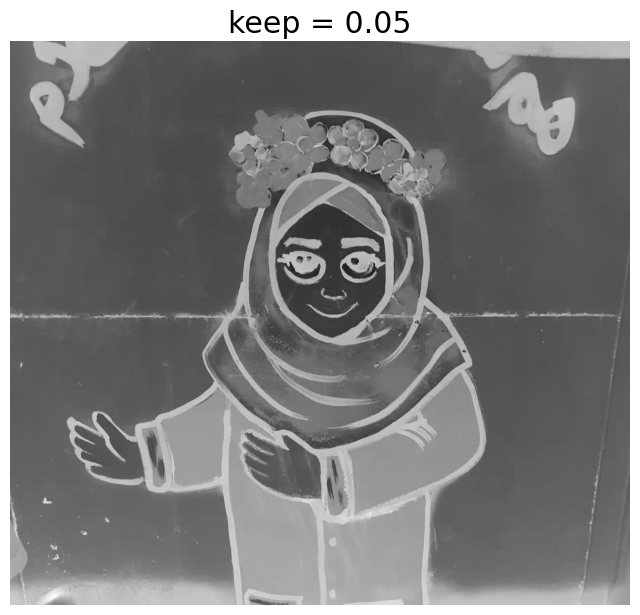

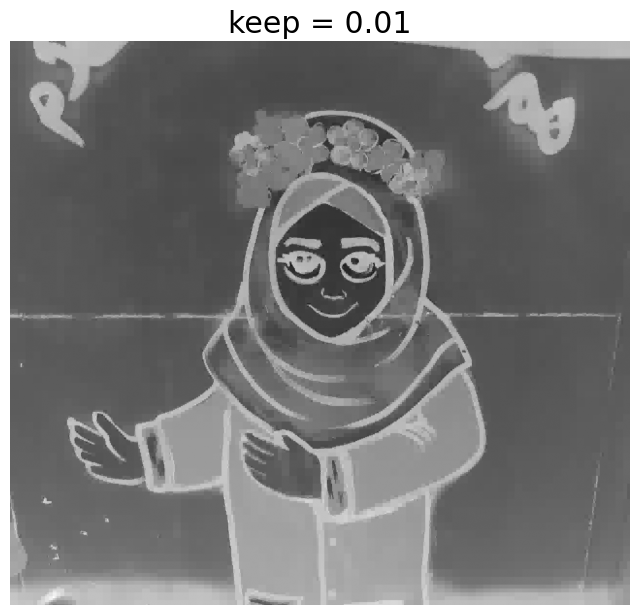

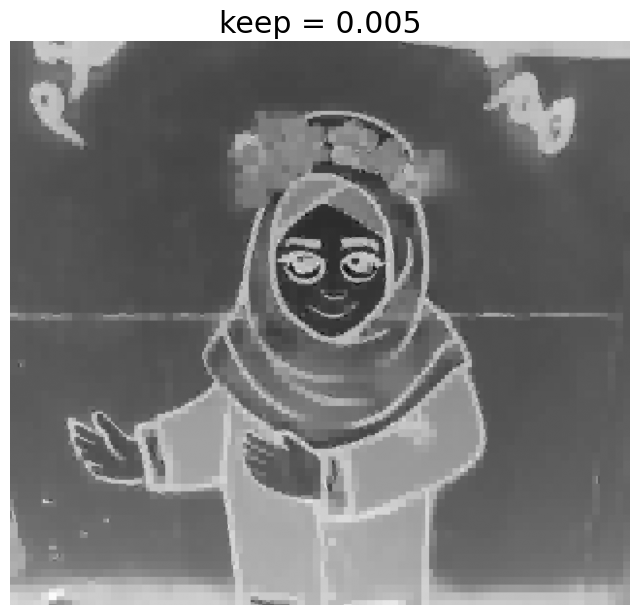

In [5]:
# Wavelet Compression
n = 4
w = 'db1'
coeffs = pywt.wavedec2(B, wavelet=w, level=n)

coeff_arr, coeff_slices = pywt.coeffs_to_array(coeffs)

Csort = np.sort(np.abs(coeff_arr.reshape(-1)))

for keep in (0.1, 0.05, 0.01, 0.005):
    thresh = Csort[int(np.floor((1 - keep) * len(Csort)))]
    ind = np.abs(coeff_arr) > thresh
    Cfilt = coeff_arr * ind  # Threshold small indices

    coeffs_filt = pywt.array_to_coeffs(Cfilt, coeff_slices, output_format='wavedec2')

    # Plot reconstruction
    Arecon = pywt.waverec2(coeffs_filt, wavelet=w)
    plt.figure()
    plt.imshow(Arecon.astype('uint8'), cmap='gray_r')

    plt.axis('off')
    plt.rcParams['figure.figsize'] = [8, 8]
    plt.title('keep = ' + str(keep))

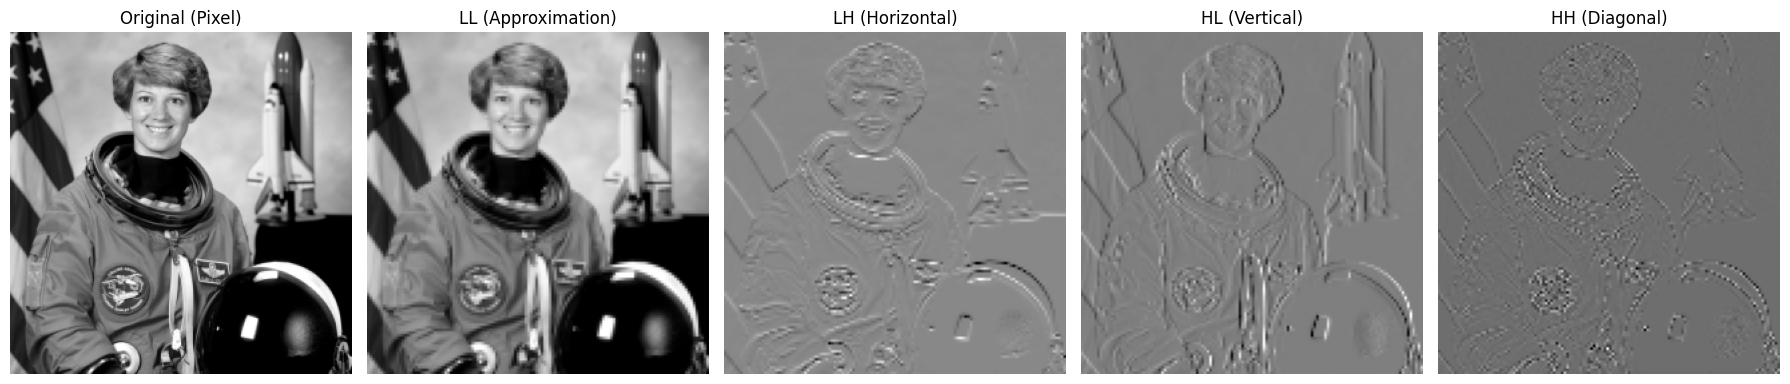

In [ ]:
import pywt
import matplotlib.pyplot as plt
import numpy as np
from skimage import color, data
from skimage.transform import resize

# Step 1: Load and preprocess an image (grayscale)
image = color.rgb2gray(data.astronaut())  # example image
image = resize(image, (256, 256))         # Resize for easier DWT visualization

# Step 2: Apply 2D Discrete Wavelet Transform (DWT)
wavelet = 'haar'  # or 'db1', 'db2', 'sym2', etc.
coeffs2 = pywt.dwt2(image, wavelet)
LL, (LH, HL, HH) = coeffs2  # Approximation, Horizontal, Vertical, Diagonal

# Step 3: Plot the original and transformed subbands
fig, axes = plt.subplots(1, 5, figsize=(18, 4))
titles = ['Original (Pixel)', 'LL (Approximation)', 'LH (Horizontal)', 'HL (Vertical)', 'HH (Diagonal)']
images = [image, LL, LH, HL, HH]

for ax, title, img in zip(axes, titles, images):
    ax.imshow(img, cmap='gray')
    ax.set_title(title)
    ax.axis('off')

plt.tight_layout()
plt.show()
